In [3]:
import numpy as np
from bson import json_util
import helix as hx
from helix import units
import numpy as np
import strax as sx                    
from matplotlib import pyplot as plt
from glob import glob 
import os
import shutil

raw_data_dir = 'toy_data'  # to save the raw toy data
helix_data_dir = 'test_helix_data'  # to save the run metadata
run = 'run10' 
duration = 10  # seconds
baseline_step = 0  # add a baseline equal to baseline_step*channel_index to each channel 

In [4]:
context = sx.Context(storage=[sx.DataDirectory(helix_data_dir, provide_run_metadata=True), ],
                     register=[hx.MMCRecords,
                               hx.QPTriggers, hx.UVTriggers,
                               hx.Events, hx.NoiseEvents,
                               hx.NoisePSDs, hx.FitResults])    # all the plugins required for getting fit_results
config = {'run_metadata_directory': helix_data_dir,      # for the hx.ToyDataRawRecords plugin
          'noise_events_random_seed': 0}  # for the hx.NoiseEvents plugin
context.set_config(config)

In [17]:
psd = context.get_array(run, 'noise_psds')
records = context.get_array(run, 'raw_records')
uv_triggers = context.get_array(run, 'uv_triggers')
qp_triggers = context.get_array(run, 'qp_triggers')
events = context.get_array(run, 'events')
fit_results = context.get_array(run, 'fit_results')  
raw_data = events['channel_data']

Loading noise_psds: |               | 0.00 % [00:00<?], #1 (0.02 s). 6744.1 MB/s
Loading raw_records: |              | 0.00 % [00:00<?], #1 (0.04 s). 2916.4 MB/s
Loading uv_triggers: |               | 0.00 % [00:00<?], #1 (0.00 s). 634.8 kB/s
Loading qp_triggers: |                 | 0.00 % [00:00<?], #1 (0.00 s). 0.0 kB/s
Loading events: |                   | 0.00 % [00:00<?], #1 (0.03 s). 4735.9 MB/s
Loading fit_results: |                 | 0.00 % [00:01<?], #1 (1.59 s). 9.2 kB/s


In [23]:
print(psd.dtype)  # Shows the field names and types
print(psd.shape)  # Shows the shape of the array


[(('Start time since unix epoch [ns]', 'time'), '<i8'), (('Exclusive end time since unix epoch [ns]', 'endtime'), '<i8'), (('Number of noise events used to calculate the PSDs', 'n_events'), '<i4'), (('Noise PSDs in ADC^2/Hz', 'psds'), '<f8', (50, 16385)), (('Noise CSDs in ADC^2/Hz', 'csds'), '<f8', (1225, 16385)), (('PSD frequencies in Hz', 'frequencies'), '<f8', (16385,)), (('Channel numbers', 'channels'), '<i2', (50,)), (('Noise PSDs of summed channels in ADC^2/Hz', 'summed_channel_psds'), '<f8', (3, 16385)), (('Types of the summed channels', 'summed_channel_types'), '<i2', (3,))]
(1,)


In [24]:
psd_values = psd['psds']  # Shape (n_time_intervals, n_channels, psd_length)
print("Extracted PSD shape:", psd_values.shape)


Extracted PSD shape: (1, 50, 16385)


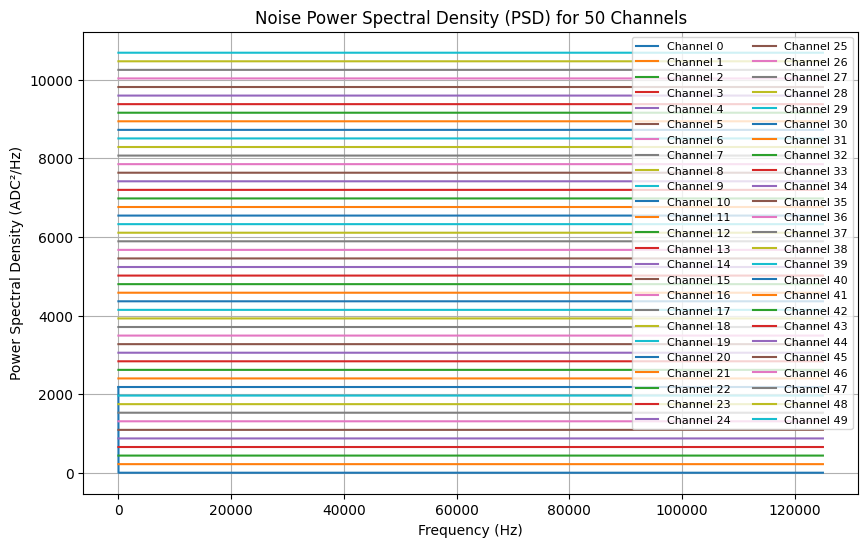

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Extract PSD and frequency data
psd_values = psd['psds'][0]  # Remove time dimension -> shape (50, 16385)
frequencies = psd['frequencies'][0]  # Extract frequency axis

# Shift factor to separate curves visually
shift_step = np.max(psd_values) * 0.1  # Adjust this value if needed

# Plot PSDs for all 50 channels with upward shift
plt.figure(figsize=(10, 6))
for i in range(psd_values.shape[0]):  # Loop over 50 channels
    plt.plot(frequencies, psd_values[i] + i * shift_step, label=f"Channel {i}")

plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (ADC²/Hz)")
plt.title("Noise Power Spectral Density (PSD) for 50 Channels")
plt.legend(loc="upper right", fontsize=8, ncol=2)  # Adjust legend size
plt.grid(True)
plt.show()


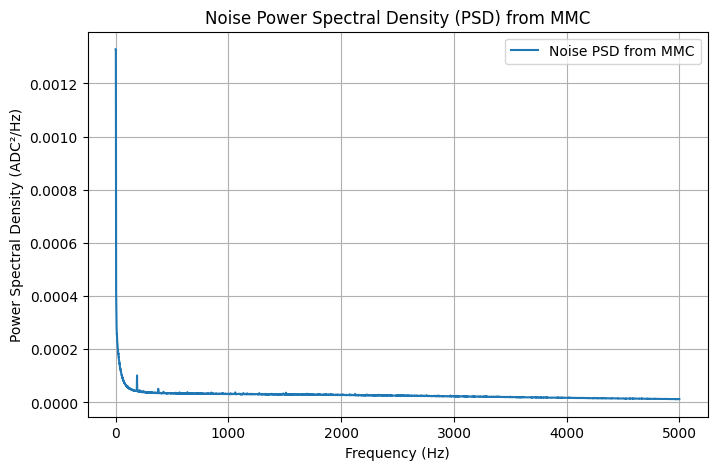

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Load the PSD data from the .npy file
file_path = "plugins/event_rqs/noise_psd_from_MMC.npy"  # Update path if needed
psd_mmc = np.load(file_path)

# Check the shape of the loaded data
sampling_frequency = 10_000  # Example, adjust if needed
freqs = np.fft.fftfreq(len(psd_mmc), d=1 / sampling_frequency)
# Plot the PSD (linear scale)
plt.figure(figsize=(8, 5))
plt.plot(freqs[:len(freqs)//2], psd_mmc[:len(freqs)//2], label="Noise PSD from MMC")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (ADC²/Hz)")
plt.title("Noise Power Spectral Density (PSD) from MMC")
plt.legend()
plt.grid(True)
plt.show()
